<a href="https://colab.research.google.com/github/ishank296/Data-Analysis-Using-Pyspark/blob/main/spark_on_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
!wget -q https://mirrors.ocf.berkeley.edu/apache/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz

In [ ]:
!ls

sample_data  spark-3.1.2-bin-hadoop3.2.tgz


In [ ]:
!tar xf spark-3.1.2-bin-hadoop3.2.tgz

In [ ]:
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop3.2"

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [ ]:
from pyspark.sql.functions import col,count,desc,struct,max,lower
from matplotlib import pyplot as plt

In [ ]:
spark

In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
!ls drive/MyDrive/data-analysis-using-spark/

genre.csv  listenings.csv


In [ ]:
genre_dataframe=spark.read.format("csv")\
  .option('inferSchema','true')\
  .option('header','true')\
  .load("drive/MyDrive/data-analysis-using-spark/genre.csv")

In [ ]:
genre_dataframe.printSchema()

root
 |-- artist: string (nullable = true)
 |-- genre: string (nullable = true)



In [ ]:
listenings_dataframe=spark.read.format("csv")\
    .option('inferschema','true')\
    .option('header','true')\
    .load("drive/MyDrive/data-analysis-using-spark/listenings.csv")

In [ ]:
genre_dataframe.show(5)

+----------+-----+
|    artist|genre|
+----------+-----+
|      Muse| rock|
|   Nirvana| rock|
|  Bon Jovi| rock|
|The Police| rock|
|      Kiss| rock|
+----------+-----+
only showing top 5 rows



In [ ]:
listenings_dataframe.printSchema()

root
 |-- user_id: string (nullable = true)
 |-- date: long (nullable = true)
 |-- track: string (nullable = true)
 |-- artist: string (nullable = true)
 |-- album: string (nullable = true)



In [ ]:
listenings_dataframe.show(5)

+-----------+-------------+--------------------+---------+-----------------+
|    user_id|         date|               track|   artist|            album|
+-----------+-------------+--------------------+---------+-----------------+
|000Silenced|1299680100000|           Price Tag| Jessie J|      Who You Are|
|000Silenced|1299679920000|Price Tag (Acoust...| Jessie J|        Price Tag|
|000Silenced|1299679440000|Be Mine! (Ballad ...|    Robyn|         Be Mine!|
|000Silenced|1299679200000|            Acapella|    Kelis|         Acapella|
|000Silenced|1299675660000|   I'm Not Invisible|The Tease|I'm Not Invisible|
+-----------+-------------+--------------------+---------+-----------------+
only showing top 5 rows



In [ ]:
listenings_dataframe.count()

14650594

In [ ]:
listenings_dataframe = listenings_dataframe.drop('date')

In [ ]:
listenings_dataframe = listenings_dataframe.na.drop()

In [ ]:
listenings_dataframe.count()

13758905

In [ ]:
listenings_dataframe.show(5)

+-----------+--------------------+---------+-----------------+
|    user_id|               track|   artist|            album|
+-----------+--------------------+---------+-----------------+
|000Silenced|           Price Tag| Jessie J|      Who You Are|
|000Silenced|Price Tag (Acoust...| Jessie J|        Price Tag|
|000Silenced|Be Mine! (Ballad ...|    Robyn|         Be Mine!|
|000Silenced|            Acapella|    Kelis|         Acapella|
|000Silenced|   I'm Not Invisible|The Tease|I'm Not Invisible|
+-----------+--------------------+---------+-----------------+
only showing top 5 rows



In [ ]:
shape = (listenings_dataframe.count(),len(listenings_dataframe.columns))

In [ ]:
shape

(13758905, 4)

**Query #0:** select two columns track and artist

In [ ]:
q0=listenings_dataframe.select('track','artist')
q0.show(5)

+--------------------+---------+
|               track|   artist|
+--------------------+---------+
|           Price Tag| Jessie J|
|Price Tag (Acoust...| Jessie J|
|Be Mine! (Ballad ...|    Robyn|
|            Acapella|    Kelis|
|   I'm Not Invisible|The Tease|
+--------------------+---------+
only showing top 5 rows



**Query #1:** Find all records of those users who have listened to ***Rihanaa***

In [ ]:
q1 = listenings_dataframe.filter(listenings_dataframe.artist=='Rihanna')
q1.show(10)

+-----------+--------------------+-------+--------------------+
|    user_id|               track| artist|               album|
+-----------+--------------------+-------+--------------------+
|000Silenced|Don't Stop The Mu...|Rihanna|Addicted 2 Bassli...|
|000Silenced|           Disturbia|Rihanna|Good Girl Gone Ba...|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|         Complicated|Rihanna|                Loud|
|00williamsl|What's My Name (f...|Rihanna|                Loud|
|00williamsl|Kanye West feat R...|Rihanna|                Loud|
|    0502008|Only Girl (In the...|Rihanna|                Loud|
|      0rdos|Pon De Replay (Re...|Rihanna|    Music of the Sun|
|      0rdos|          Now I Know|Rihanna|    Music of the Sun|
+-----------+--------------------+-------+--------------------+
only showing top 10 rows



**Query #2 :** Top 10 users who are fan of Rihanna

In [ ]:
q2 = listenings_dataframe\
           .filter(listenings_dataframe.artist=='Rihanna')\
           .groupby('user_id').agg(count('user_id').alias('cnt'))\
           .orderBy(desc('cnt')).limit(10)
q2.show()

+---------------+---+
|        user_id|cnt|
+---------------+---+
|        thiessu|179|
|    eyessetkyle|166|
|           adxx|164|
|missnumberthree|156|
|helloiamnatalie|128|
|          nmjnb|124|
|        AndyyyA|123|
|     BIGBANG186|121|
|     mixedvibes|120|
|       AndyKitt|115|
+---------------+---+



**Query #3:** Find top 10 famous tracks

In [ ]:
q3 = listenings_dataframe.select('artist','track')\
                        .groupby('artist','track')\
                        .agg(count('*').alias('cnt'))\
                        .orderBy(desc('cnt')).limit(10)
q3.show()

+--------------+-----------------+----+
|        artist|            track| cnt|
+--------------+-----------------+----+
| Justin Bieber|            Sorry|3381|
|Arctic Monkeys| Do I Wanna Know?|2865|
|      Bon Iver|      Skinny Love|2836|
|          Zayn|       PILLOWTALK|2701|
|   The Killers|    Mr Brightside|2690|
|       Rihanna|             Work|2646|
|      Bastille|          Pompeii|2606|
|Mumford & Sons|  Little Lion Man|2520|
|Mumford & Sons|         The Cave|2485|
| Justin Bieber|What Do You Mean?|2481|
+--------------+-----------------+----+



**Query #4 :** Top 10 famous tracks of ***Rihanna*** 

In [ ]:
q4 = listenings_dataframe.select('artist','track')\
                .filter(listenings_dataframe.artist=='Rihanna')\
                .groupby('artist','track')\
                .agg(count('*').alias('cnt'))\
                .orderBy(desc('cnt')).limit(10)
q4.show()

+-------+--------------------+----+
| artist|               track| cnt|
+-------+--------------------+----+
|Rihanna|                Work|2646|
|Rihanna|Only Girl (In the...|1749|
|Rihanna|We Found Love (fe...|1575|
|Rihanna|                 S&M|1307|
|Rihanna|            Rude Boy|1303|
|Rihanna|            Diamonds|1224|
|Rihanna|      Kiss it Better| 945|
|Rihanna| Where Have You Been| 844|
|Rihanna|Cheers (Drink to ...| 697|
|Rihanna|           Needed Me| 679|
+-------+--------------------+----+



**Query #5 :** famous top 10 albums

In [ ]:
q5 = listenings_dataframe.select('artist','album').groupby('artist','album')\
                          .agg(count('*').alias('cnt'))\
                          .orderBy(desc('cnt')).limit(10)
q5.show()

+--------------------+--------------------+-----+
|              artist|               album|  cnt|
+--------------------+--------------------+-----+
|          Kanye West|   The Life Of Pablo|22310|
|              The xx|                  xx|14195|
|      Arctic Monkeys|                  AM|14090|
|               alt-J|     An Awesome Wave|13635|
|      Mumford & Sons|        Sigh No More|13543|
|      Arctic Monkeys|Whatever People S...|12731|
|            Bon Iver|            For Emma|11994|
|              Grimes|          Art Angels|11655|
|Florence + the Ma...|               Lungs|11362|
|               Adele|                  21|11215|
+--------------------+--------------------+-----+



importing ***genre.csv*** file in spark

In [ ]:
genre_dataframe.show(5)

+----------+-----+
|    artist|genre|
+----------+-----+
|      Muse| rock|
|   Nirvana| rock|
|  Bon Jovi| rock|
|The Police| rock|
|      Kiss| rock|
+----------+-----+
only showing top 5 rows



In [ ]:
data = listenings_dataframe.join(genre_dataframe,how="inner",on=['artist'])
data.show(10)

+--------+-----------+--------------------+-----------+--------------------+
|  artist|    user_id|               track|      album|               genre|
+--------+-----------+--------------------+-----------+--------------------+
|Jessie J|000Silenced|           Price Tag|Who You Are| Ariana Grande & ...|
|Jessie J|000Silenced|           Price Tag|Who You Are| Jhene Aiko & Rixton|
|Jessie J|000Silenced|           Price Tag|Who You Are| Nicki Minaj & Ar...|
|Jessie J|000Silenced|           Price Tag|Who You Are|                 pop|
|Jessie J|000Silenced|Price Tag (Acoust...|  Price Tag| Ariana Grande & ...|
|Jessie J|000Silenced|Price Tag (Acoust...|  Price Tag| Jhene Aiko & Rixton|
|Jessie J|000Silenced|Price Tag (Acoust...|  Price Tag| Nicki Minaj & Ar...|
|Jessie J|000Silenced|Price Tag (Acoust...|  Price Tag|                 pop|
|   Robyn|000Silenced|Be Mine! (Ballad ...|   Be Mine!|                 pop|
|   Kelis|000Silenced|            Acapella|   Acapella|                 pop|

**Query #6 :** Top 10 users who are fan of pop music

In [ ]:
q6 = data.filter(data.genre=='pop').select('user_id').groupby('user_id')\
         .agg(count('user_id').alias('cnt'))\
         .orderBy(desc('cnt')).limit(10)
q6.show()

+---------------+---+
|        user_id|cnt|
+---------------+---+
|        01Green|496|
|      momousagi|400|
|          mrpsb|400|
|   BlueKnockOut|378|
|    musicboy80s|376|
|  incultojurgis|374|
| ElektricOrchid|370|
|foreign_fanatic|350|
|   Kevin_Soutar|346|
|  landrover2171|301|
+---------------+---+



**Query #7 :** Top 10 famous genres

In [ ]:
q7 = data.select('genre').groupby('genre').count().orderBy(desc('count')).limit(10)
q7.show()

+----------+-------+
|     genre|  count|
+----------+-------+
|      rock|2691934|
|       pop|1544747|
|electronic| 551509|
|   hip hop| 532984|
|      folk| 438174|
|indie rock| 431439|
|      punk| 380915|
|       r&b| 344101|
|     metal| 208107|
|     indie| 206726|
+----------+-------+



**Query #8 :** Find each user's favorite genre

In [ ]:
q8_1 = data.select('user_id','genre').groupby('user_id','genre')\
      .agg(count('*').alias('cnt'))\
      .orderBy('user_id')
q8_1.show(10)

+-------+--------------------+---+
|user_id|               genre|cnt|
+-------+--------------------+---+
| --Seph|           indie pop|  1|
| --Seph|               house|  3|
| --Seph|   progressive house|  1|
| --Seph|           classical| 31|
| --Seph| The Ambrosian Si...|  1|
| --Seph| Tamás Vásáry & Y...|  1|
| --Seph|          electropop|  1|
| --Seph|     Jennifer Vyvyan|  1|
| --Seph|          Thom Yorke|  2|
| --Seph|                soul|  1|
+-------+--------------------+---+
only showing top 10 rows



In [ ]:
q8_2 = q8_1.groupBy('user_id').agg(max(struct(col('cnt'),col('genre'))).alias('max'))
q8_2.show(10)

+--------------+-----------------+
|       user_id|              max|
+--------------+-----------------+
|       -Gemma-|{38, british pop}|
|       247flix|   {78, synthpop}|
|    A3sahaettr|      {60, metal}|
|       AYFBlog| {98, indie rock}|
| AdamMcSpaddam|       {79, rock}|
|       Alukarl|{85, death metal}|
|      Ambalina|        {53, pop}|
|       AndyEgg|       {54, rock}|
|AngerisaGift14|       {58, rock}|
|     Anndddyyy|      {116, rock}|
+--------------+-----------------+
only showing top 10 rows



In [ ]:
q8_2.select('user_id','max.genre').show()

+---------------+-----------------+
|        user_id|            genre|
+---------------+-----------------+
|        -Gemma-|      british pop|
|        247flix|         synthpop|
|     A3sahaettr|            metal|
|        AYFBlog|       indie rock|
|  AdamMcSpaddam|             rock|
|        Alukarl|      death metal|
|       Ambalina|              pop|
|        AndyEgg|             rock|
| AngerisaGift14|             rock|
|      Anndddyyy|             rock|
|     BasilBrush|             rock|
|     BernieLick|             rock|
|      Big_Tiger|            indie|
|          Birks|singer-songwriter|
|         BolaJA|             rock|
|        Boone92|        metalcore|
|CameronWhittall|              pop|
|        Ceolmor|       electronic|
| CheeseMonkey91|              emo|
|  Chilled-Lemon|             rock|
+---------------+-----------------+
only showing top 20 rows



**Query #9 :** Find out how many ***rock,pop,hip hop,metals*** singers do we have 

In [ ]:
q9 = genre_dataframe.select('genre').filter(lower(col('genre')).isin(['hip hop','rock','pop','metal']))\
                    .groupby('genre').agg(count('*').alias('cnt'))
q9.show()

+-------+----+
|  genre| cnt|
+-------+----+
|    pop|6960|
|hip hop|4288|
|  metal|1854|
|   rock|9066|
+-------+----+



In [ ]:
q9.collect()

[Row(genre='pop', cnt=6960),
 Row(genre='hip hop', cnt=4288),
 Row(genre='metal', cnt=1854),
 Row(genre='rock', cnt=9066)]

In [ ]:
labels = [e.genre for e in q9.collect()]
count = [e.cnt for e in q9.collect()]
print(labels)
print(count)

['pop', 'hip hop', 'metal', 'rock']
[6960, 4288, 1854, 9066]


<BarContainer object of 4 artists>

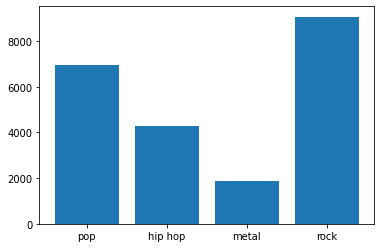

In [ ]:
plt.bar(labels,count)